# Contents

- <a href='#1'>1. Abstract</a>
- <a href='#2'>2. Acknowledgements</a>
- <a href='#3'>3. Data</a>
- <a href='#4'>4. Exploratory Data Analysis</a>
- <a href='#5'>5. Part A - Linear model</a> 
- <a href='#6'>6. Part B - Logistic model</a> 
- <a href='#7'>7. Part C - Multi-colinearity and step-wise regression</a> 
- <a href='#8'>8. Part D - Interaction effects</a>
- <a href='#9'>9. Part E - Regularization</a>
- <a href='#10'>10. Conclusion</a>
- <a href='#11'>11. Contributions statement</a>
- <a href='#12'>12. Citations</a>
- <a href='#13'>13. License</a>

# <a id='1'>1. Abstract</a>



The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures",  then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities on this synthetically generated IBM dataset. 

The main motive of this assignment is to perform EDA, logistic regression, linear regression and do Multi-colinearity and step-wise regression to predict the age of the employee that quits and to predict weather the employee with quit  or not.

We will also answer some specific questions based on our linear and logistic models.





# <a id='2'>2. Acknowledgements</a>

Source: This is a fictional dataset that was made by the data scientists at IBM for data analysis. The dataset has been taken from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). The overview section of the dataset says "Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists". 

# <a id='3'>3. Data</a>

Age	
Attrition	
BusinessTravel	
DailyRate	
Department	
DistanceFromHome	
Education	
EducationField	
EmployeeCount	
EmployeeNumber	
EnvironmentSatisfaction	
Gender	
HourlyRate	
JobInvolvement	
JobLevel	
JobRole	
JobSatisfaction	
MaritalStatus	
MonthlyIncome	
MonthlyRate	
NumCompaniesWorked	
Over18	
OverTime	
PercentSalaryHike	
PerformanceRating	
RelationshipSatisfaction	
StandardHours	
StockOptionLevel	
TotalWorkingYears	
TrainingTimesLastYear	
WorkLifeBalance	
YearsAtCompany	
YearsInCurrentRole	
YearsSinceLastPromotion	
YearsWithCurrManager


In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn import linear_model 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn.model_selection import KFold


import warnings
warnings.filterwarnings('ignore')

# <a id='4'>4. Exploratory Data Analysis</a>

Let us load in the dataset via the trusty Pandas package into a dataframe object and have a quick look at the first few rows

In [2]:
attrition = pd.read_csv('C:\\Users\\kunal\\Downloads\\DataScienceAssignment2\\IBM.csv')
attrition.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

As evinced from the dataset, our target column with which we can point our model to train on would be the "Attrition" column. 

Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, we shall handle their numerical encoding in the latter chapter. This section will be devoted to data exploration and as a first step, let us quickly carry our some simple data completeness checks to see if there are nulls or infinite values in the data

**Data quality checks**

To look for any null values, we can just invoke the **isnull** call as follows

In [3]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### Distribution of the dataset

Generally one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, I shall invoke the familiar **kdeplot** function from the Seaborn plotting library and this generates bivariate plots as follows:

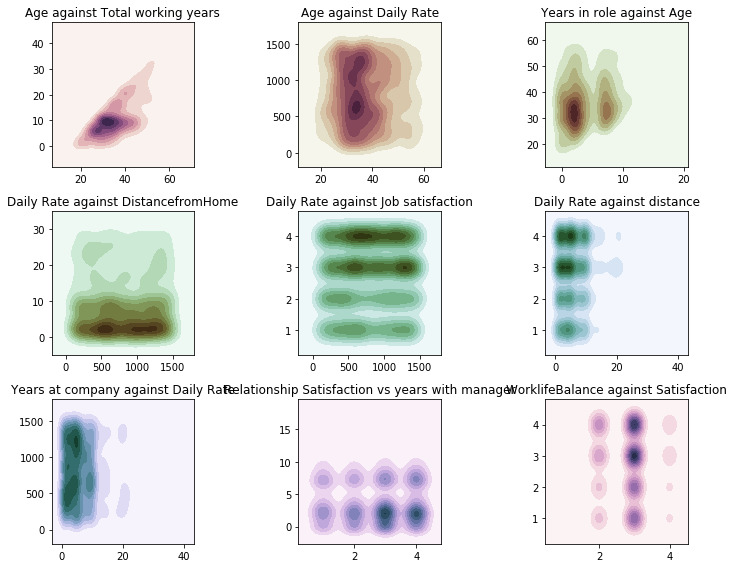

In [4]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()


In [5]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

As we are going to do linear regression and predict the age of the employees that quit. We will take all the employees with Attrition == yes and do an analysis on those employees.

In [6]:

#To select rows whose column value equals a scalar, some_value, use ==:

df = attrition.loc[attrition['Attrition'] == 'Yes']
print (df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
42     26       Yes      Travel_Rarely       1357  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   

In [7]:
#This will give us the details of the data
df.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  237.000000   237.000000        237.000000  237.000000          237.0   
mean    33.607595   750.362869         10.632911    2.839662            1.0   
std      9.689350   401.899519          8.452525    1.008244            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     28.000000   408.000000          3.000000    2.000000            1.0   
50%     32.000000   699.000000          9.000000    3.000000            1.0   
75%     39.000000  1092.000000         17.000000    4.000000            1.0   
max     58.000000  1496.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      237.000000               237.000000  237.000000      237.000000   
mean      1010.345992                 2.464135   65.573840        2.518987   
std        580.750572                 1.169791   20.099958        0.773405   
min          1.000000                 1.000000   31.000000        1.000000   
25%        514.000000                 1.000000   50.000000        2.000000   
50%       1017.000000                 3.000000   66.000000        3.000000   
75%       1486.000000                 4.000000   84.000000        3.000000   
max       2055.000000                 4.000000  100.000000        4.000000   

         JobLevel         ...           StandardHours  StockOptionLevel  \
count  237.000000         ...                   237.0        237.000000   
mean     1.637131         ...                    80.0          0.527426   
std      0.940594         ...                     0.0          0.856361   
min      1.000000         ...                    80.0          0.000000   
25%      1.000000         ...                    80.0          0.000000   
50%      1.000000         ...                    80.0          0.000000   
75%      2.000000         ...                    80.0          1.000000   
max      5.000000         ...                    80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count         237.000000             237.000000       237.000000   
mean            8.244726               2.624473         2.658228   
std             7.169204               1.254784         0.816453   
min             0.000000               0.000000         1.000000   
25%             3.000000               2.000000         2.000000   
50%             7.000000               2.000000         3.000000   
75%            10.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count      237.000000          237.000000               237.000000   
mean         5.130802            2.902954                 1.945148   
std          5.949984            3.174827                 3.153077   
min          0.000000            0.000000                 0.000000   
25%          1.000000            0.000000                 0.000000   
50%          3.000000            2.000000                 1.000000   
75%          7.000000            4.000000                 2.000000   
max         40.000000           15.000000                15.000000   

       YearsWithCurrManager  Attrition_numerical  
count            237.000000                237.0  
mean               2.852321                  1.0  
std                3.143349                  0.0  
min                0.000000                  1.0  
25%                0.000000                  1.0  
50%                2.000000                  1.0  
75%                5.000000                  1.0  
max               14.000000                  1.0  

[8 rows x 27 columns]

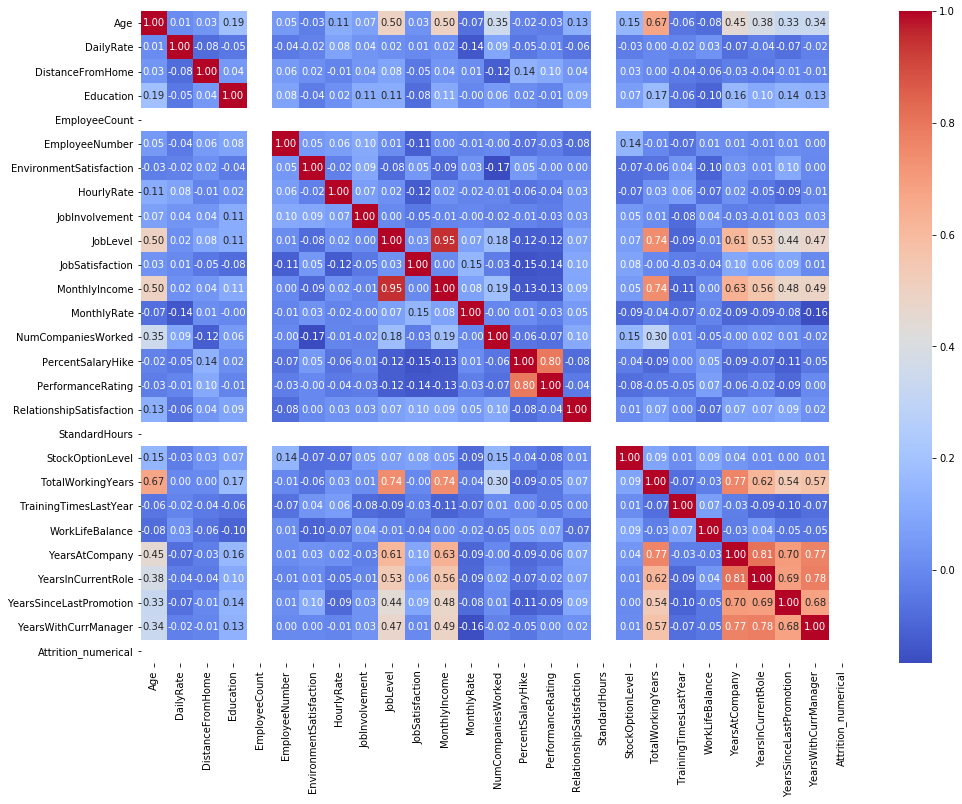

In [8]:
# The below code gives us the heatmap for correlation between numerical columns
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,0:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

The below code will help us to see the correlation between the different attributes. The closer it is to 1, better is the correlation. If it is negative, there is an inverse correlation. 

In [9]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.009640          0.033881   0.192184   
DailyRate                 0.009640   1.000000         -0.080002  -0.048073   
DistanceFromHome          0.033881  -0.080002          1.000000   0.044774   
Education                 0.192184  -0.048073          0.044774   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber            0.048357  -0.041120          0.056168   0.079936   
EnvironmentSatisfaction  -0.030219  -0.019782          0.019447  -0.037230   
HourlyRate                0.112644   0.080470         -0.013819   0.023586   
JobInvolvement            0.070830   0.035421          0.039637   0.112600   
JobLevel                  0.500386   0.017825          0.083905   0.112644   
JobSatisfaction           0.031509   0.005118         -0.046744  -0.075939   
MonthlyIncome             0.500602   0.020175          0.038948   0.105162   
MonthlyRate              -0.070142  -0.135200          0.014747  -0.004583   
NumCompaniesWorked        0.349638   0.091391         -0.121304   0.056101   
PercentSalaryHike        -0.020759  -0.046404          0.137674   0.015257   
PerformanceRating        -0.033040  -0.011172          0.102790  -0.012334   
RelationshipSatisfaction  0.128509  -0.059042          0.042372   0.085021   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.150161  -0.034317          0.025690   0.068913   
TotalWorkingYears         0.672621   0.000203          0.004146   0.170176   
TrainingTimesLastYear    -0.056433  -0.016391         -0.041019  -0.064541   
WorkLifeBalance          -0.075944   0.026762         -0.060009  -0.102884   
YearsAtCompany            0.452909  -0.072555         -0.029204   0.157490   
YearsInCurrentRole        0.384303  -0.035748         -0.041440   0.104989   
YearsSinceLastPromotion   0.329246  -0.067234         -0.006959   0.141172   
YearsWithCurrManager      0.336577  -0.022054         -0.009864   0.132882   
Attrition_numerical            NaN        NaN               NaN        NaN   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN        0.048357   
DailyRate                           NaN       -0.041120   
DistanceFromHome                    NaN        0.056168   
Education                           NaN        0.079936   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.046517   
HourlyRate                          NaN        0.064489   
JobInvolvement                      NaN        0.104871   
JobLevel                            NaN        0.011944   
JobSatisfaction                     NaN       -0.112501   
MonthlyIncome                       NaN        0.000209   
MonthlyRate                         NaN       -0.014304   
NumCompaniesWorked                  NaN       -0.002654   
PercentSalaryHike                   NaN       -0.065988   
PerformanceRating                   NaN       -0.034016   
RelationshipSatisfaction            NaN       -0.078919   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.144574   
TotalWorkingYears                   NaN       -0.005427   
TrainingTimesLastYear               NaN       -0.065952   
WorkLifeBalance                     NaN        0.010787   
YearsAtCompany                      NaN        0.006834   
YearsInCurrentRole                  NaN       -0.013633   
YearsSinceLastPromotion             NaN        0.014126   
YearsWithCurrManager                NaN        0.003141   
Attrition_numerical                 NaN             NaN   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                     -0.030219    0.112644        0.070830   
DailyRate                      

In [10]:
# Checking for null values
df.isnull().values.any() 

False

In [11]:
# To get total null values for each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Creating dummy variables:

### One Hot Encoding

We need to create the dummy variables to turn the categories into high(1) and low(0) value for something the regression can understand. In statistics, particularly in regression analysis, a dummy variable (also known as an indicator variable, design variable, one-hot encoding, Boolean indicator, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. In python we can create dummy variables using pandas. For our dataset we need to create the dummy varaible for columns like Gender and Department.

In [12]:
#creating the dummy varibales for Gender in df:
df = pd.get_dummies(df,columns= ['Gender'],drop_first=True)


In [13]:
#creating the dummy varibales for Department in df:
df = pd.get_dummies(df,columns= ['Department'],drop_first=True)


In [14]:
#creating the dummy varibales for Gender in Attrition :
attrition = pd.get_dummies(attrition,columns= ['Gender'],drop_first=True)


In [15]:
#creating the dummy varibales Department in Attrition:
attrition = pd.get_dummies(attrition,columns= ['Department'],drop_first=True)


In [16]:
#creating the dummy varibales for Attrition column in attrition:
attrition = pd.get_dummies(attrition,columns= ['Attrition'],drop_first=True)


In [17]:
attrition.head()

Age     BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41      Travel_Rarely       1102                 1          2   
1   49  Travel_Frequently        279                 8          1   
2   37      Travel_Rarely       1373                 2          2   
3   33  Travel_Frequently       1392                 3          4   
4   27      Travel_Rarely        591                 2          1   

  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0  Life Sciences              1               1                        2   
1  Life Sciences              1               2                        3   
2          Other              1               4                        4   
3  Life Sciences              1               5                        4   
4        Medical              1               7                        1   

   HourlyRate      ...       WorkLifeBalance  YearsAtCompany  \
0          94      ...                     1               6   
1          61      ...                     3              10   
2          92      ...                     3               0   
3          56      ...                     3               8   
4          40      ...                     3               2   

  YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
0                  4                        0                    5   
1                  7                        1                    7   
2                  0                        0                    0   
3                  7                        3                    0   
4                  2                        2                    2   

   Attrition_numerical  Gender_Male  Department_Research & Development  \
0                    1            0                                  0   
1                    0            1                                  1   
2                    1            1                                  1   
3                    0            0                                  1   
4                    0            1                                  1   

  Department_Sales Attrition_Yes  
0                1             1  
1                0             0  
2                0             1  
3                0             0  
4                0             0  

[5 rows x 37 columns]

In [18]:
df.head()

Age Attrition BusinessTravel  DailyRate  DistanceFromHome  Education  \
0    41       Yes  Travel_Rarely       1102                 1          2   
2    37       Yes  Travel_Rarely       1373                 2          2   
14   28       Yes  Travel_Rarely        103                24          3   
21   36       Yes  Travel_Rarely       1218                 9          4   
24   34       Yes  Travel_Rarely        699                 6          1   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0   Life Sciences              1               1                        2   
2           Other              1               4                        4   
14  Life Sciences              1              19                        3   
21  Life Sciences              1              27                        3   
24        Medical              1              31                        2   

         ...         TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0        ...                             0                1               6   
2        ...                             3                3               0   
14       ...                             4                3               4   
21       ...                             4                3               5   
24       ...                             2                3               4   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
0                   4                        0                    5   
2                   0                        0                    0   
14                  2                        0                    3   
21                  3                        0                    3   
24                  2                        1                    3   

    Attrition_numerical  Gender_Male  Department_Research & Development  \
0                     1            0                                  0   
2                     1            1                                  1   
14                    1            1                                  1   
21                    1            1                                  0   
24                    1            1                                  1   

   Department_Sales  
0                 1  
2                 0  
14                0  
21                1  
24                0  

[5 rows x 37 columns]

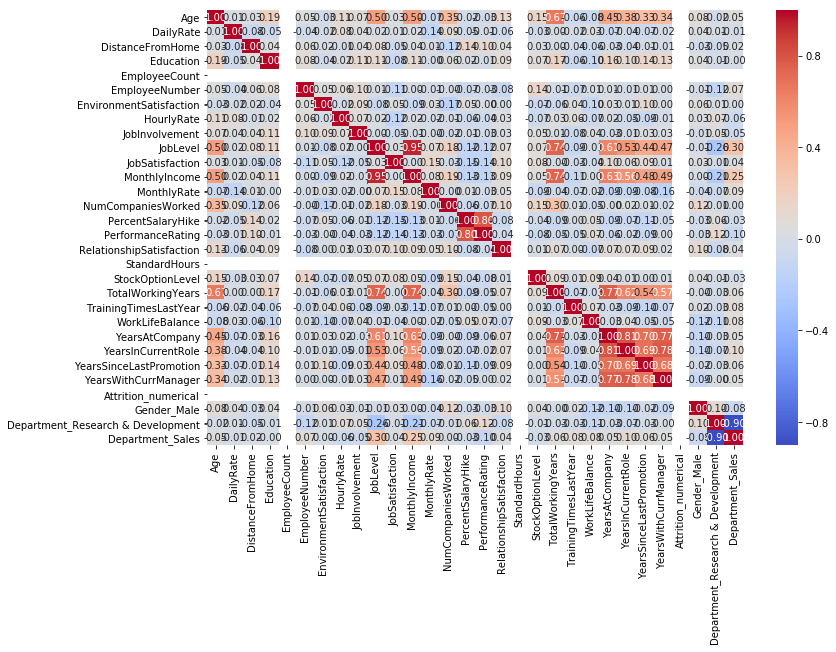

In [19]:
#Ploting heat maps to check for factors that affect quality
plt.figure(figsize=(12,8))
#fmt='.2f'->2 decimals, annot -> numerical representation, iloc-> primary integer position
sns.heatmap(data=df.iloc[:,0:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [20]:
df.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  237.000000   237.000000        237.000000  237.000000          237.0   
mean    33.607595   750.362869         10.632911    2.839662            1.0   
std      9.689350   401.899519          8.452525    1.008244            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     28.000000   408.000000          3.000000    2.000000            1.0   
50%     32.000000   699.000000          9.000000    3.000000            1.0   
75%     39.000000  1092.000000         17.000000    4.000000            1.0   
max     58.000000  1496.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      237.000000               237.000000  237.000000      237.000000   
mean      1010.345992                 2.464135   65.573840        2.518987   
std        580.750572                 1.169791   20.099958        0.773405   
min          1.000000                 1.000000   31.000000        1.000000   
25%        514.000000                 1.000000   50.000000        2.000000   
50%       1017.000000                 3.000000   66.000000        3.000000   
75%       1486.000000                 4.000000   84.000000        3.000000   
max       2055.000000                 4.000000  100.000000        4.000000   

         JobLevel        ...         TrainingTimesLastYear  WorkLifeBalance  \
count  237.000000        ...                    237.000000       237.000000   
mean     1.637131        ...                      2.624473         2.658228   
std      0.940594        ...                      1.254784         0.816453   
min      1.000000        ...                      0.000000         1.000000   
25%      1.000000        ...                      2.000000         2.000000   
50%      1.000000        ...                      2.000000         3.000000   
75%      2.000000        ...                      3.000000         3.000000   
max      5.000000        ...                      6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count      237.000000          237.000000               237.000000   
mean         5.130802            2.902954                 1.945148   
std          5.949984            3.174827                 3.153077   
min          0.000000            0.000000                 0.000000   
25%          1.000000            0.000000                 0.000000   
50%          3.000000            2.000000                 1.000000   
75%          7.000000            4.000000                 2.000000   
max         40.000000           15.000000                15.000000   

       YearsWithCurrManager  Attrition_numerical  Gender_Male  \
count            237.000000                237.0   237.000000   
mean               2.852321                  1.0     0.632911   
std                3.143349                  0.0     0.483031   
min                0.000000                  1.0     0.000000   
25%                0.000000                  1.0     0.000000   
50%                2.000000                  1.0     1.000000   
75%                5.000000                  1.0     1.000000   
max               14.000000                  1.0     1.000000   

       Department_Research & Development  Department_Sales  
count                         237.000000        237.000000  
mean                            0.561181          0.388186  
std                             0.497293          0.488369  
min                             0.000000          0.000000  
25%                             0.000000          0.000000  
50%                             1.000000          0.000000  
75%                             1.000000          1.000000  
max                             1.000000          1.000000  

[8 rows x 30 columns]

### Pairplot Visualisations

Now let us create some Seaborn pairplots and set it against the target variable which is our Attrition column to get a feel for how the various features are distributed vis-a-vis employee attrition

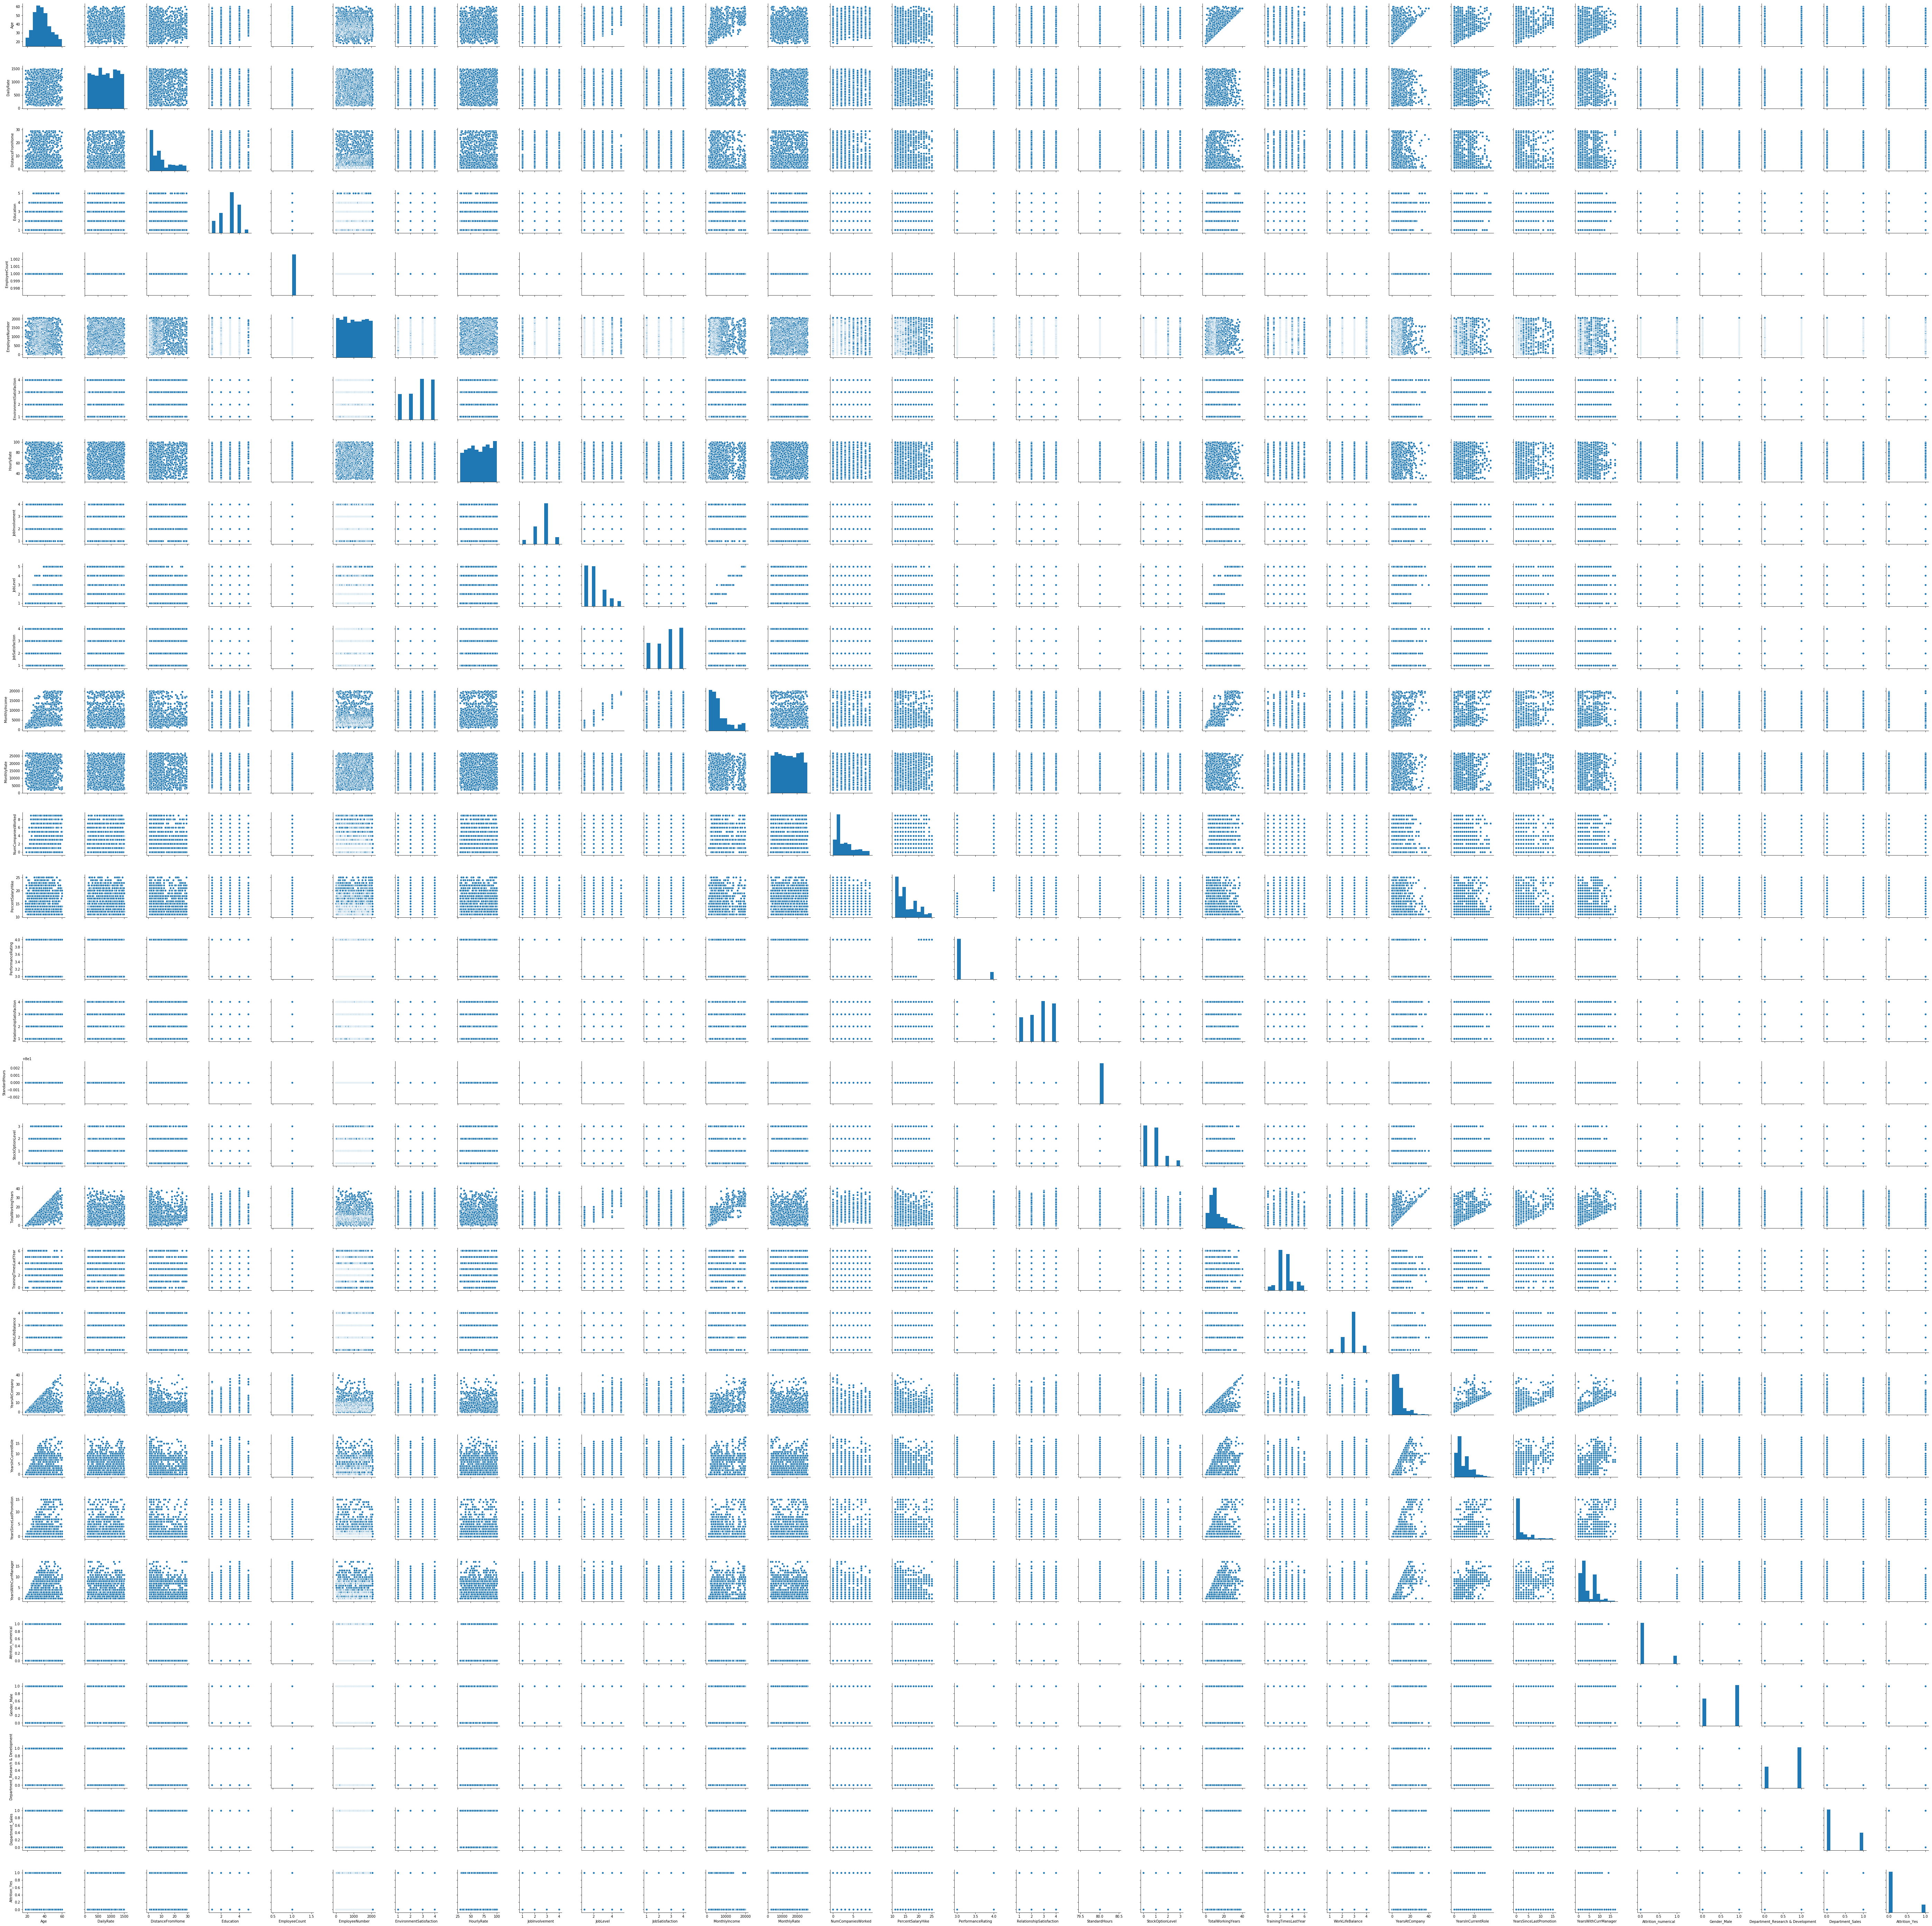

In [21]:
sns.pairplot(attrition)


**Takeaway from the plots**

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. 

Plotting pairplots with help of seaborn to plot the regression between different features and target for better selection of parameters


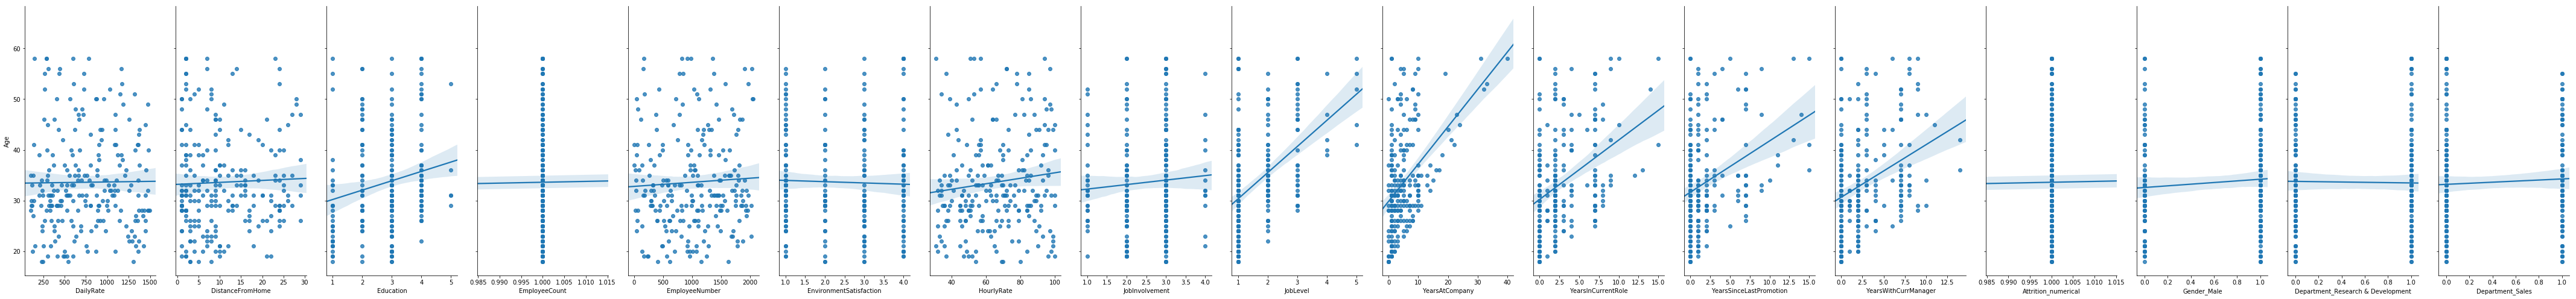

In [22]:

features = ['DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition_numerical','Gender_Male','Department_Research & Development','Department_Sales']
x = df[features]
y = df['Age']
#plotting features vs age
sns.pairplot(df,x_vars=features,y_vars='Age',kind='reg',height=7,aspect=0.5)

# <a id='5'>5.Linear Models</a>





Linear regression:
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.
Multivariate Linear Regression Model takes all of the independent variables into consideration. In reality, not all of the variables observed are highly statistically important. That means, some of the variables make greater impact to the dependent variable Y, while some of the variables are not statistically important at all.

We will try to get the by model by checking its r square value and its aic, bic values. The closer the r2 is to 1, the better the model. The lesser the aic/bic values, the better the model.

### Null Hypothesis

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.
So, for eliminating the features, we will check its p-values. The better features are the ones that have p-values lesser than 0.05. In other words, a predictor that has a low p-value is likely to be a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable.

We have used step-wise linear regression by following the backward elimination approach in the following 3 models.

These are the following assumptions for linear model.

1. Linear relationship
2. Multivariate normality
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity

## Model 1 :

### Splitting the data into train and test data

In [23]:
df.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  237.000000   237.000000        237.000000  237.000000          237.0   
mean    33.607595   750.362869         10.632911    2.839662            1.0   
std      9.689350   401.899519          8.452525    1.008244            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     28.000000   408.000000          3.000000    2.000000            1.0   
50%     32.000000   699.000000          9.000000    3.000000            1.0   
75%     39.000000  1092.000000         17.000000    4.000000            1.0   
max     58.000000  1496.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      237.000000               237.000000  237.000000      237.000000   
mean      1010.345992                 2.464135   65.573840        2.518987   
std        580.750572                 1.169791   20.099958        0.773405   
min          1.000000                 1.000000   31.000000        1.000000   
25%        514.000000                 1.000000   50.000000        2.000000   
50%       1017.000000                 3.000000   66.000000        3.000000   
75%       1486.000000                 4.000000   84.000000        3.000000   
max       2055.000000                 4.000000  100.000000        4.000000   

         JobLevel        ...         TrainingTimesLastYear  WorkLifeBalance  \
count  237.000000        ...                    237.000000       237.000000   
mean     1.637131        ...                      2.624473         2.658228   
std      0.940594        ...                      1.254784         0.816453   
min      1.000000        ...                      0.000000         1.000000   
25%      1.000000        ...                      2.000000         2.000000   
50%      1.000000        ...                      2.000000         3.000000   
75%      2.000000        ...                      3.000000         3.000000   
max      5.000000        ...                      6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count      237.000000          237.000000               237.000000   
mean         5.130802            2.902954                 1.945148   
std          5.949984            3.174827                 3.153077   
min          0.000000            0.000000                 0.000000   
25%          1.000000            0.000000                 0.000000   
50%          3.000000            2.000000                 1.000000   
75%          7.000000            4.000000                 2.000000   
max         40.000000           15.000000                15.000000   

       YearsWithCurrManager  Attrition_numerical  Gender_Male  \
count            237.000000                237.0   237.000000   
mean               2.852321                  1.0     0.632911   
std                3.143349                  0.0     0.483031   
min                0.000000                  1.0     0.000000   
25%                0.000000                  1.0     0.000000   
50%                2.000000                  1.0     1.000000   
75%                5.000000                  1.0     1.000000   
max               14.000000                  1.0     1.000000   

       Department_Research & Development  Department_Sales  
count                         237.000000        237.000000  
mean                            0.561181          0.388186  
std                             0.497293          0.488369  
min                             0.000000          0.000000  
25%                             0.000000          0.000000  
50%                             1.000000          0.000000  
75%                             1.000000          1.000000  
max                             1.000000          1.000000  

[8 rows x 30 columns]

In [24]:
X = df[['DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition_numerical','Gender_Male','Department_Research & Development','Department_Sales']]
Y = df[['Age']]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 17)
(48, 17)
(189, 1)
(48, 1)


We'll fit our training data into regression model and calculate mean squared error 
To Calculate we need to :

Find the regression line.
Insert your X values into the linear regression equation to find the new Y values (Y').
Subtract the new Y value from the original to get the error.
Square the errors.
Add up the errors.
Find the mean.

In [26]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

56.5625


In [27]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     7.279
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           5.82e-13
Time:                        15:50:23   Log-Likelihood:                -826.44
No. Observations:                 237   AIC:                             1685.
Df Residuals:                     221   BIC:                             1740.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyRate                             0.0004      0.001      0.273      0.785      -0.002       0.003
DistanceFromHome                      0.0174      0.065      0.269      0.788      -0.110       0.145
Education                             1.0024      0.545      1.838      0.067      -0.072       2.077
EmployeeCount                         7.1740      2.046      3.506      0.001       3.142      11.206
EmployeeNumber                        0.0006      0.001      0.656      0.513      -0.001       0.002
EnvironmentSatisfaction              -0.1539      0.471     -0.327      0.744      -1.081       0.773
HourlyRate                            0.0422      0.027      1.551      0.122      -0.011       0.096
JobInvolvement                        0.6731      0.709      0.949      0.343      -0.724       2.070
JobLevel                              3.6611      0.790      4.637      0.000       2.105       5.217
YearsAtCompany                        0.3540      0.189      1.873      0.062      -0.019       0.727
YearsInCurrentRole                    0.2270      0.327      0.695      0.488      -0.417       0.871
YearsSinceLastPromotion               0.0447      0.261      0.171      0.864      -0.470       0.559
YearsWithCurrManager                 -0.2301      0.304     -0.757      0.450      -0.829       0.369
Attrition_numerical                   7.1740      2.046      3.506      0.001       3.142      11.206
Gender_Male                           1.8979      1.133      1.675      0.095      -0.335       4.131
Department_Research & Development     2.8077      2.531      1.109      0.269      -2.181       7.796
Department_Sales                      1.4697      2.592      0.567      0.571      -3.639       6.578
==============================================================================
Omnibus:                       37.100   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.417
Skew:                           1.001   Prob(JB):                     1.13e-11
Kurtosis:                       4.048   Cond. No.                     1.08e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
reg.score(X_test,Y_test)

0.37236683264197457

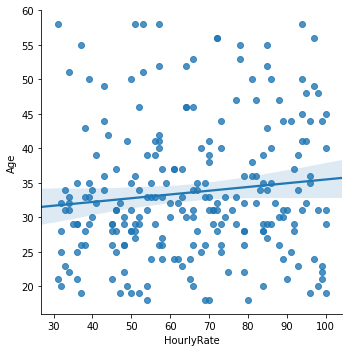

In [29]:
sns.lmplot(x='HourlyRate',y='Age',data=df)

##### Cross validation of model using k-fold cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
4. Take the group as a hold out or test data set
5. Take the remaining groups as a training data set
6. Fit a model on the training set and evaluate it on the test set
7. Retain the evaluation score and discard the model
8. Summarize the skill of the model using the sample of model evaluation scores

In [30]:
#k-fold 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

-96.60366076732967

In [31]:
ms_errors= cross_val_score(reg, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
rms_errors

array([8.67903584, 8.46270981, 9.62930182, 7.1897614 , 8.35653789])

### Questions

* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable.
  - Yes 
* Cross-validate the model. How well did it do? - 70.36
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared : 0.331 
    AIC : 1685.
    BIC : 1740.

## Model 2 :

In [32]:
X = df[['DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition_numerical','Gender_Male','Department_Research & Development','Department_Sales']]
Y = df[['Age']]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 15)
(48, 15)
(189, 1)
(48, 1)


In [34]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

57.4375


In [35]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     7.789
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           2.45e-13
Time:                        15:50:24   Log-Likelihood:                -826.67
No. Observations:                 237   AIC:                             1683.
Df Residuals:                     222   BIC:                             1735.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyRate                             0.0003      0.001      0.247      0.805      -0.002       0.003
DistanceFromHome                      0.0189      0.064      0.294      0.769      -0.108       0.146
Education                             1.0235      0.544      1.882      0.061      -0.048       2.095
EnvironmentSatisfaction              -0.1424      0.470     -0.303      0.762      -1.068       0.783
HourlyRate                            0.0434      0.027      1.604      0.110      -0.010       0.097
JobInvolvement                        0.7172      0.705      1.018      0.310      -0.672       2.106
JobLevel                              3.6516      0.788      4.631      0.000       2.098       5.205
YearsAtCompany                        0.3554      0.189      1.882      0.061      -0.017       0.727
YearsInCurrentRole                    0.2202      0.326      0.675      0.500      -0.422       0.863
YearsSinceLastPromotion               0.0476      0.261      0.183      0.855      -0.466       0.561
YearsWithCurrManager                 -0.2272      0.304     -0.748      0.455      -0.825       0.371
Attrition_numerical                  14.8762      4.007      3.713      0.000       6.980      22.773
Gender_Male                           1.9023      1.131      1.681      0.094      -0.327       4.132
Department_Research & Development     2.5998      2.508      1.037      0.301      -2.343       7.542
Department_Sales                      1.3451      2.582      0.521      0.603      -3.743       6.433
==============================================================================
Omnibus:                       37.064   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.403
Skew:                           0.999   Prob(JB):                     1.14e-11
Kurtosis:                       4.055   Cond. No.                     7.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
reg.score(X_test,Y_test)

0.09214041719190157

In [37]:
#k-fold 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

-239.30847920045167

In [38]:
ms_errors= cross_val_score(reg, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
rms_errors

array([8.37052866, 8.47757901, 9.61855644, 7.20382619, 8.26756982])

### Questions

* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable.
  - Yes 
* Cross-validate the model. How well did it do? - 18.38
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared : 0.329
    AIC:1683.
    BIC:1735.

## Model 3 :

In [39]:
def multiple_regression_model(train, features):
    reg = LinearRegression() # Create a linear regression object
    reg.fit(train[features], train['Age'])
    result = sm.OLS(train['Age'], train[features]).fit()
    print (result.summary())
    #Applying K-fold cross validation
    score = cross_val_score(estimator = reg , X = train[features], y = train['Age'], cv = 6)
    print('Mean Score:' + str(score.mean()))
    print('Variance Score:' + str(score.std()))

In [40]:
multiple_regression_model(df, ['HourlyRate','YearsWithCurrManager','Gender_Male','Department_Research & Development','Department_Sales','EnvironmentSatisfaction'])

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     445.6
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          5.90e-124
Time:                        15:50:24   Log-Likelihood:                -878.70
No. Observations:                 237   AIC:                             1769.
Df Residuals:                     231   BIC:                             1790.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Hourly

In [41]:
X = df[['HourlyRate','YearsWithCurrManager','Gender_Male','Department_Research & Development','Department_Sales','EnvironmentSatisfaction']]
Y = df[['Age']]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 6)
(48, 6)
(189, 1)
(48, 1)


In [43]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

82.75


In [44]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     445.6
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          5.90e-124
Time:                        15:50:24   Log-Likelihood:                -878.70
No. Observations:                 237   AIC:                             1769.
Df Residuals:                     231   BIC:                             1790.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
HourlyRate                            0.1666      0.027      6.086      0.000       0.113       0.221
YearsWithCurrManager                  1.1973      0.208      5.759      0.000       0.788       1.607
Gender_Male                           3.6358      1.348      2.698      0.007       0.980       6.291
Department_Research & Development    14.2036      2.285      6.217      0.000       9.702      18.705
Department_Sales                     15.5598      2.292      6.788      0.000      11.043      20.076
EnvironmentSatisfaction               0.9140      0.524      1.744      0.082      -0.119       1.947
==============================================================================
Omnibus:                       10.454   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.502
Skew:                           0.478   Prob(JB):                      0.00524
Kurtosis:                       2.613   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
reg.score(X_test,Y_test)

0.07243501697716004

In [46]:
ms_errors= cross_val_score(reg, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
rms_errors

array([ 9.02067786, 10.12947721,  9.92380347,  8.27398765,  8.58722551])

In [47]:
#k-fold 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

-81.21461322748023

## Multicolinearity and Step wise regression

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. While,Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF:
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you   should consider dropping the variable.

In [48]:
#Multi-collinearity :
x = attrition[[]]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] =  X.columns
vif.round(1)

VIF Factor                           features
0         8.4                         HourlyRate
1         1.8               YearsWithCurrManager
2         2.7                        Gender_Male
3         7.0  Department_Research & Development
4         4.8                   Department_Sales
5         4.8            EnvironmentSatisfaction

### Questions :
* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable. 
  - Yes 
* Cross-validate the model. How well did it do? - 29.9
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared:	0.92 
    AIC:	1769.
    BIC:	1790
    
    Hence, Based on the value of r-sq, Model 3 gives us the best results

### As we can see, the model 3 is the best of all the models. It has r square value which is really good. ie 0.92. The r square value tells us if the model is a good fit.  

 
 # <a id='6'>6. Logistic Models</a>

Logistic regression , or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.). Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$


Assumptions :

1. Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

2. Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

3. Logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

4. Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

5. Logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model.

## Model 1

In [49]:
logReg = LogisticRegression()

## Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [50]:
RFE = RFE(logReg, n_features_to_select=8)
x = attrition[['DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition_numerical','Gender_Male','Department_Research & Development','Department_Sales']]
y = attrition[['Attrition_Yes']]
RFE = RFE.fit(x,y)
print(RFE.support_)
print(RFE.ranking_)

[False False  True  True False  True False  True  True False False False
 False  True False  True  True]
[ 9  7  1  1 10  1  8  1  1  6  2  3  5  1  4  1  1]


### Here,we use RFE to help us select features from all the existing features to consider for building our model.The output True/1 are the features which have to be considered.

In [51]:
x = attrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','YearsWithCurrManager','Department_Research & Development','Department_Sales']]
y = attrition[['Attrition_Yes']]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [53]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred = logReg.predict(x_test)

In [55]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[364,   1],
       [ 73,   3]], dtype=int64)

### The above confusion matrix gives the probability of 1s & 0s (accurate and inaccurate predictions respectively), for example if we add 376 and 3 and divide by the total of all 4 values, we get the probability of accurate predictions. Its the probability of true values with the total values and thats how we get the accuracy.

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       365
           1       0.75      0.04      0.07        76

   micro avg       0.83      0.83      0.83       441
   macro avg       0.79      0.52      0.49       441
weighted avg       0.82      0.83      0.76       441



In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [59]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.846


In [60]:
model = sm.Logit(y.astype(float),x.astype(float))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.403490
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1463
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Apr 2019   Pseudo R-squ.:                 0.08650
Time:                        15:50:24   Log-Likelihood:                -593.13
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 6.653e-22
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Education                             0.0666      0.069      0.969      0.333      -0.068       0.201
EnvironmentSatisfaction              -0.1962      0.064     -3.060      0.002      -0.322      -0.071
JobInvolvement                       -0.3265      0.090     -3.612      0.000      -0.504      -0.149
JobLevel                             -0.4453      0.093     -4.800      0.000      -0.627      -0.263
YearsWithCurrManager                 -0.0906      0.026     -3.494      0.000      -0.141      -0.040
Department_Research & Development     0.4720      0.311      1.519      0.129      -0.137       1.081
Department_Sales                      1.1268      0.330      3.417      0.001       0.481       1.773
=====================================================================================================
"""

In [61]:
# to caculate the probability of dependent variable
probability=logReg.predict_proba(x_test) 
print(probability)

[[0.98535671 0.01464329]
 [0.88193551 0.11806449]
 [0.96970867 0.03029133]
 [0.98312801 0.01687199]
 [0.89186057 0.10813943]
 [0.54372348 0.45627652]
 [0.8523931  0.1476069 ]
 [0.70102804 0.29897196]
 [0.94320518 0.05679482]
 [0.86591163 0.13408837]
 [0.88572024 0.11427976]
 [0.90629908 0.09370092]
 [0.68023598 0.31976402]
 [0.98584291 0.01415709]
 [0.90341624 0.09658376]
 [0.92893532 0.07106468]
 [0.84247509 0.15752491]
 [0.83588855 0.16411145]
 [0.93796726 0.06203274]
 [0.9112378  0.0887622 ]
 [0.88551199 0.11448801]
 [0.93292291 0.06707709]
 [0.90626137 0.09373863]
 [0.89818179 0.10181821]
 [0.83435889 0.16564111]
 [0.91226579 0.08773421]
 [0.86803135 0.13196865]
 [0.9406048  0.0593952 ]
 [0.79683418 0.20316582]
 [0.89243309 0.10756691]
 [0.85489904 0.14510096]
 [0.87883021 0.12116979]
 [0.65931265 0.34068735]
 [0.90323188 0.09676812]
 [0.98757651 0.01242349]
 [0.76010967 0.23989033]
 [0.97255412 0.02744588]
 [0.79294125 0.20705875]
 [0.95971118 0.04028882]
 [0.80069044 0.19930956]


Is the relationship significant?

yes

Are any model assumptions violated?

No

Cross-validate the model. How well did it do?

Score - 84.7%

Calculate the probability of getting the dependent variable.

--> We got the probability array above.

# Model 2

In [62]:
x = attrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','YearsWithCurrManager','Department_Sales']]
y = attrition[['Attrition_Yes']]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [64]:
logReg = LogisticRegression()

In [65]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = logReg.predict(x_test)


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       1.00      0.03      0.06        60

   micro avg       0.84      0.84      0.84       368
   macro avg       0.92      0.52      0.49       368
weighted avg       0.87      0.84      0.78       368



In [68]:
accuracy_score(y_test,y_pred)

0.842391304347826

In [69]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [70]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.842


In [71]:
model = sm.Logit(y,x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 Apr 2019   Pseudo R-squ.:                     inf
Time:                        15:50:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Education                   0.1028      0.065      1.587      0.112      -0.024       0.230
EnvironmentSatisfaction    -0.1628      0.060     -2.698      0.007      -0.281      -0.045
JobInvolvement             -0.2572      0.078     -3.288      0.001      -0.410      -0.104
JobLevel                   -0.4174      0.090     -4.652      0.000      -0.593      -0.242
YearsWithCurrManager       -0.0891      0.026     -3.452      0.001      -0.140      -0.039
Department_Sales            0.6916      0.157      4.402      0.000       0.384       1.000
===========================================================================================
"""

In [72]:
# to caculate the probability of dependent variable
probability=logReg.predict_proba(x_test) 
print(probability)

[[0.89922945 0.10077055]
 [0.94855747 0.05144253]
 [0.8854546  0.1145454 ]
 [0.91510447 0.08489553]
 [0.93210822 0.06789178]
 [0.80372868 0.19627132]
 [0.86215931 0.13784069]
 [0.86032873 0.13967127]
 [0.75310081 0.24689919]
 [0.95417097 0.04582903]
 [0.98360658 0.01639342]
 [0.7800785  0.2199215 ]
 [0.70693145 0.29306855]
 [0.8048783  0.1951217 ]
 [0.88194618 0.11805382]
 [0.88914669 0.11085331]
 [0.96257935 0.03742065]
 [0.84318974 0.15681026]
 [0.83965183 0.16034817]
 [0.79214841 0.20785159]
 [0.86081847 0.13918153]
 [0.67209781 0.32790219]
 [0.87796827 0.12203173]
 [0.91769817 0.08230183]
 [0.65941724 0.34058276]
 [0.95090059 0.04909941]
 [0.89250718 0.10749282]
 [0.9659407  0.0340593 ]
 [0.7260676  0.2739324 ]
 [0.7989462  0.2010538 ]
 [0.99400507 0.00599493]
 [0.78198681 0.21801319]
 [0.83398962 0.16601038]
 [0.86169124 0.13830876]
 [0.91061551 0.08938449]
 [0.91299734 0.08700266]
 [0.94314628 0.05685372]
 [0.82962692 0.17037308]
 [0.97005652 0.02994348]
 [0.94230476 0.05769524]


Is the relationship significant?

yes

Are any model assumptions violated?

No

Cross-validate the model. How well did it do?

83.8%

Calculate the probability of getting the dependent variable.

We got the probability array above.

# Model 3

In [73]:
x = attrition[['EnvironmentSatisfaction','JobInvolvement','JobLevel','YearsWithCurrManager','Department_Sales']]
y = attrition[['Attrition_Yes']]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [75]:
logReg = LogisticRegression()

In [76]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_pred = logReg.predict(x_test)


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       301
           1       0.80      0.06      0.11        67

   micro avg       0.83      0.83      0.83       368
   macro avg       0.81      0.53      0.51       368
weighted avg       0.82      0.83      0.76       368



In [79]:
accuracy_score(y_test,y_pred)

0.8260869565217391

In [80]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [81]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.847


In [82]:
model = sm.Logit(y,x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1465
Method:                           MLE   Df Model:                            4
Date:                Fri, 05 Apr 2019   Pseudo R-squ.:                     inf
Time:                        15:50:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EnvironmentSatisfaction    -0.1411      0.059     -2.398      0.016      -0.256      -0.026
JobInvolvement             -0.1978      0.069     -2.886      0.004      -0.332      -0.063
JobLevel                   -0.3800      0.085     -4.451      0.000      -0.547      -0.213
YearsWithCurrManager       -0.0868      0.026     -3.372      0.001      -0.137      -0.036
Department_Sales            0.6945      0.156      4.438      0.000       0.388       1.001
===========================================================================================
"""

In [83]:
# to caculate the probability of dependent variable
probability=logReg.predict_proba(x_test) 
print(probability)

[[0.49515214 0.50484786]
 [0.87664313 0.12335687]
 [0.77361171 0.22638829]
 [0.82145538 0.17854462]
 [0.96104721 0.03895279]
 [0.6707922  0.3292078 ]
 [0.92864355 0.07135645]
 [0.88675603 0.11324397]
 [0.97772046 0.02227954]
 [0.87758811 0.12241189]
 [0.92668854 0.07331146]
 [0.62190836 0.37809164]
 [0.95018047 0.04981953]
 [0.88910993 0.11089007]
 [0.92292227 0.07707773]
 [0.83100017 0.16899983]
 [0.95037436 0.04962564]
 [0.72304462 0.27695538]
 [0.96433261 0.03566739]
 [0.94721166 0.05278834]
 [0.90177308 0.09822692]
 [0.94336595 0.05663405]
 [0.83769822 0.16230178]
 [0.85228119 0.14771881]
 [0.86852813 0.13147187]
 [0.94393144 0.05606856]
 [0.90805329 0.09194671]
 [0.78096796 0.21903204]
 [0.63526978 0.36473022]
 [0.82830612 0.17169388]
 [0.82257598 0.17742402]
 [0.96100835 0.03899165]
 [0.87181959 0.12818041]
 [0.9123943  0.0876057 ]
 [0.88910993 0.11089007]
 [0.85884601 0.14115399]
 [0.74479085 0.25520915]
 [0.88073539 0.11926461]
 [0.92668854 0.07331146]
 [0.93208515 0.06791485]


 [0.80661985 0.19338015]]


### As we can see, model 3 is the best of all the 3 models.

We have an accuracy of 86% which is the best of of all the models
* Is the relationship significant? 

  - yes
  
* Are any model assumptions violated?    

  - No
  
* Cross-validate the model. How well did it do? 
  
  - 83.5% 
  
* Calculate the probability of getting the dependent variable
  
  - We got the probability array above.


 # <a id='7'>7. Multicolinearity and step wise regression</a>



Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. While,Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF:

Run a multiple regression.
Calculate the VIF factors.
Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [84]:
#Multi-collinearity :
x = attrition[[]]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] =  X.columns
vif.round(1)

VIF Factor                           features
0         8.4                         HourlyRate
1         1.8               YearsWithCurrManager
2         2.7                        Gender_Male
3         7.0  Department_Research & Development
4         4.8                   Department_Sales
5         4.8            EnvironmentSatisfaction

a. Is there any multi-colinearity in the model?   

Yes


b. In the multiple regression models are predictor variables independent of all the other predictor variables? 

No

c. In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
	
--> YearsWithCurrManager

--> Environment Satisfaction

--> Department_Sale

--> Gender_Male

d. Cross-validate the models. How well did they do?   

We calculated the cross validation score.
array([ 9.02067786, 10.12947721,  9.92380347,  8.27398765,  8.58722551])

 # <a id='8'>8. Interaction</a>


Interaction Effects in Regression
In regression, an interaction effect exists when the effect of an independent variable on a dependent variable changes, depending on the value(s) of one or more other independent variables.

Interaction Effects in Equations
In a regression equation, an interaction effect is represented as the product of two or more independent variables. For example, here is a typical regression equation without an interaction:

ŷ = b0 + b1X1 + b2X2

where ŷ is the predicted value of a dependent variable, X1 and X2 are independent variables, and b0, b1, and b2 are regression coefficients.

And here is the same regression equation with an interaction:

ŷ = b0 + b1X1 + b2X2 + b3X1X2

Here, b3 is a regression coefficient, and X1X2 is the interaction. The interaction between X1 and X2 is called a two-way interaction, because it is the interaction between two independent variables. Higher-order interactions are possible, as illustrated by the three-way interaction in the following equation:

ŷ = b0 + b1X1 + b2X2 + b3X3 + b4X1X2 + b5X1X3 + b6X2X3 + b7X1X2X3

Analysts usually steer clear of higher-order interactions, like X1X2X3, since they can be hard to interpret.

# Interaction 1

Below, we will check the interaction effect on our best model of linear regression. ie Model 3.


In [85]:
df['JobPerformance'] = df['EnvironmentSatisfaction']*df['JobInvolvement']
x = df[['JobPerformance','HourlyRate','YearsWithCurrManager','Gender_Male','Department_Research & Development','Department_Sales']]
y = df[['Age']]


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [87]:
linReg = LinearRegression()

In [88]:
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
linReg.predict(x_test)

array([[38.54056552],
       [35.34866344],
       [29.58836221],
       [29.17716707],
       [32.01336387],
       [35.42774445],
       [31.90116114],
       [31.77973013],
       [33.81995712],
       [31.20686199],
       [32.02349427],
       [26.89779455],
       [35.07756095],
       [31.22738477],
       [37.75256027],
       [32.58456704],
       [29.59686811],
       [31.285943  ],
       [28.47691373],
       [29.27402297],
       [28.42794432],
       [30.14847596],
       [29.85647993],
       [35.27989297],
       [37.12310356],
       [33.95448793],
       [35.81769508],
       [34.28898876],
       [31.45151287],
       [40.06702417],
       [35.57393095],
       [33.29528016],
       [39.57733007],
       [33.52924974],
       [35.68352546],
       [31.05419575],
       [32.15969005],
       [32.00981241],
       [32.25857211],
       [31.77455418],
       [26.92682323],
       [36.20722803],
       [28.82754027],
       [33.03789067],
       [37.43154512],
       [33

In [90]:
linReg.score(x_test,y_test)

0.029490751374584456

In [91]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)

scoring = 'accuracy'
results = model_selection.cross_val_score(logReg, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
y.head()

10-fold cross validation average accuracy: 0.028


Age
0    41
2    37
14   28
21   36
24   34

In [92]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
results1 = model1.fit(x,y)
print (results1.intercept_, results1.coef_)
#The Ordinary Least Squares method corresponds to minimizing the sum of square differences between the observed and predicted values.
model1 = sm.OLS(y,x)
results1 = model1.fit()
results1.summary()

[23.85025529] [[0.00428672 0.05556052 1.05793542 2.24954426 1.34547665 2.2944309 ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     445.7
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          5.75e-124
Time:                        15:50:25   Log-Likelihood:                -878.67
No. Observations:                 237   AIC:                             1769.
Df Residuals:                     231   BIC:                             1790.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
JobPerformance                        0.2988      0.170      1.759      0.080      -0.036       0.633
HourlyRate                            0.1667      0.027      6.094      0.000       0.113       0.221
YearsWithCurrManager                  1.1867      0.208      5.700      0.000       0.776       1.597
Gender_Male                           3.7318      1.342      2.781      0.006       1.088       6.376
Department_Research & Development    14.4987      2.230      6.502      0.000      10.105      18.892
Department_Sales                     15.9600      2.219      7.192      0.000      11.588      20.332
==============================================================================
Omnibus:                       10.404   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.548
Skew:                           0.482   Prob(JB):                      0.00512
Kurtosis:                       2.628   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interaction 2

Below, we will check the interaction effect on our best model of logistic regression. ie Model 3.


In [93]:
attrition['JobPerformance'] = attrition['EnvironmentSatisfaction']*attrition['JobInvolvement']
x = attrition[['EnvironmentSatisfaction','JobInvolvement','JobLevel','YearsWithCurrManager','Department_Sales','JobPerformance']]
y = attrition[['Attrition_Yes']]


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [95]:
logReg = LogisticRegression()

In [96]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
y_pred = logReg.predict(x_test)

In [98]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)

scoring = 'accuracy'
results = model_selection.cross_val_score(logReg, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
y.head()

10-fold cross validation average accuracy: 0.844


Attrition_Yes
0              1
1              0
2              1
3              0
4              0

In [99]:
model = sm.Logit(y,x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 Apr 2019   Pseudo R-squ.:                     inf
Time:                        15:50:26   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EnvironmentSatisfaction     0.0958      0.112      0.855      0.393      -0.124       0.316
JobInvolvement             -0.0618      0.088     -0.706      0.480      -0.233       0.110
JobLevel                   -0.4535      0.093     -4.865      0.000      -0.636      -0.271
YearsWithCurrManager       -0.0907      0.026     -3.487      0.000      -0.142      -0.040
Department_Sales            0.6750      0.158      4.272      0.000       0.365       0.985
JobPerformance             -0.1166      0.048     -2.424      0.015      -0.211      -0.022
===========================================================================================
"""

### Is there a significant synergy (interaction effect) in either of your tested product terms?
--> No, as our accuracy has decreased

 # <a id='9'>9. Regularization</a>



Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. It is used to regularalize overfitting model.

Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)

Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

Difference Between Ridge and Lasso Regularization :

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

### Since we do not have huge number of features, we will use Ridge method.


In [100]:
#Ridge method of regularization: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of very high features, say in millions, as it will pose computational challenges.
x = attrition[['EnvironmentSatisfaction','JobInvolvement','JobLevel','YearsWithCurrManager','Department_Sales']]
y = attrition[['Attrition_Yes']]
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
Age                                  1470 non-null int64
BusinessTravel                       1470 non-null object
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EducationField                       1470 non-null object
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobRole                              1470 non-null object
JobSatisfaction                      1470 non-null int64
MaritalStatus                        1470 non-null object
MonthlyIncome                     

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)

rr = linear_model.Ridge(alpha=0.5, normalize=True)
rr.fit(X_train, Y_train)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1291 to 845
Data columns (total 5 columns):
EnvironmentSatisfaction    294 non-null int64
JobInvolvement             294 non-null int64
JobLevel                   294 non-null int64
YearsWithCurrManager       294 non-null int64
Department_Sales           294 non-null uint8
dtypes: int64(4), uint8(1)
memory usage: 11.8 KB


In [102]:
rr_params = rr.get_params
rr_params

<bound method BaseEstimator.get_params of Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)>

In [103]:
predictions = rr.predict(X_test)

accuracy = cross_val_score(estimator = rr, X= x_test, y = y_test, cv = 10)
accuracy.mean()

0.06638880535659523

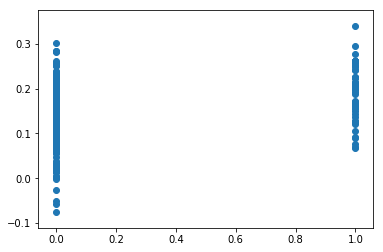

In [104]:
plt.scatter(Y_test, predictions)

 # <a id='10'>10. Conclusion</a>

The inference from the data is that the age of the employees is dependant mainly on the factors like HourlyRate	
YearsWithCurrManager,Department_Research & Development,Department_Sale and Gender_Male.

In this assignment,we have done predictive analysis on Age of the employees that quit by Linear regression and predicted the attrition of the employee using Logistic Regression.


Firstly, we performed EDA and also did data wrangling and pre-processing on our dataset using one hot encoding. We checked for the null hypothesis.

We have selected minimum of 5 independent variables in each model to find the correlation with our target dependent variable,Age using Linear and Logistic regression both techniques.

We got the best linear and logistic models with r square value of our model = 0.92 and accuracy of our logistic model = 0.84.

We have tested our independent variables for multi-collinearity among them and accordingly implemented step wise - backward regression technique to generate models for testing purpose. We have also used confusion matrix to calculate the probability of the true / accurate predictions.

We showed interaction effect between two variables that are highly correlated.
We also performed cross validation to find the score. We created a new binary categorical column.

Finally, performed Ridge regularization on linear regression and checked our accuracies against multiple alpha values.


 



 # <a id='11'>11. Contributions</a> 

By me : 60 %

By external resources : 40 %

 # <a id='12'>12. Citations</a>


https://www.kaggle.com/minatverma/nse-stocks-data

https://matplotlib.org/ 

https://www.kaggle.com/stieranka/predicting-gdp-world-countries 

http://www.numpy.org/ 

https://towardsdatascience.com/ 

https://stackoverflow.com/questions/42921399/explanation-required-in-seaborn-tutorial 

https://seaborn.pydata.org/tutorial/distributions.html 

https://pandas.pydata.org/

https://www.quora.com/What-is-regularization-in-machine-learning

http://statisticsbyjim.com/regression/interaction-effects/

https://www.statisticssolutions.com/multicollinearity/

 # <a id='13'>13. License</a>

Copyright 2019 Kunal Jaiswal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

